# Лабораторная работа №2 "Бинарная классификация отраженных сигналов радара"
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна

### Цель работы:
Реализовать классификацию между камнями (R) и металлическими цилиндрами (M) на
основе данных об отражении сигналов радара от поверхностей.
60 входных значений показывают силу отражаемого сигнала под определенным углом.
Входные данные нормализованы и находятся в промежутке от 0 до 1.
### Задачи:
- Ознакомиться с задачей бинарной классификации
- Загрузить данные
- Создать модель ИНС в tf.Keras
- Настроить параметры обучения
- Обучить и оценить модель
- Изменить модель и провести сравнение. Объяснить результаты


### Выполнение работы

Импорт библиотек

In [1]:
import pandas
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Загрузка данных и их разделение на входные и выходные

In [2]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

Перевод выходных параметров в целочисленные значения 0 и 1

In [3]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

Обучение сети с базовой архитектурой

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


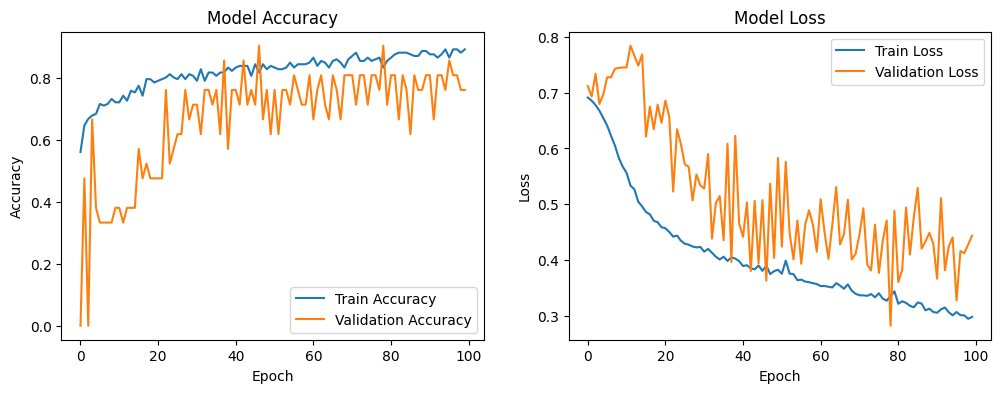

In [4]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Уменьшение размера входного слоя в два раза

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


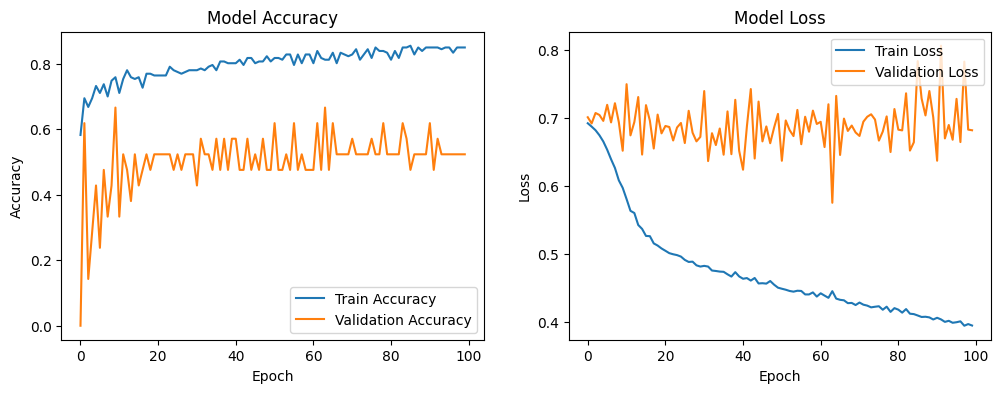

In [4]:
# Выбор случайных 30 признаков
random_indices = np.random.choice(X.shape[1], 30, replace=False)
X_reduce = X[:, random_indices]

model = Sequential()
model.add(Dense(60, input_dim=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_reduce, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

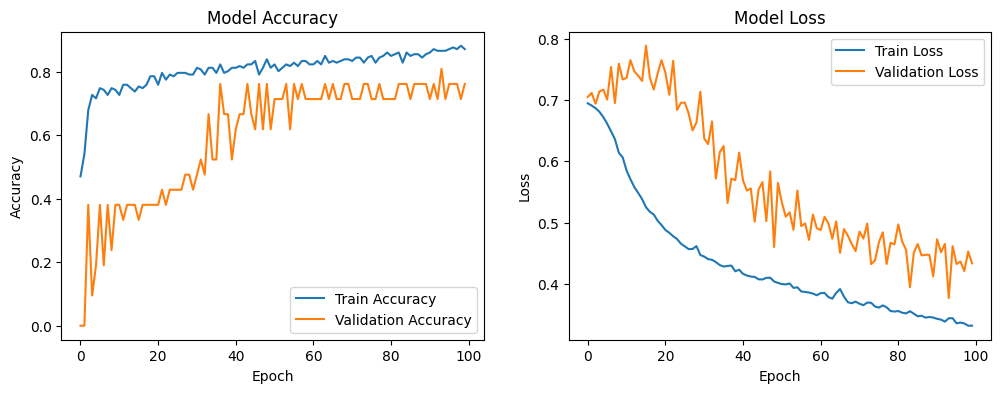

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Добавление промежуточного (скрытого) слоя Dense в архитектуру сети (размер входного слоя 30) с 15 нейронами

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


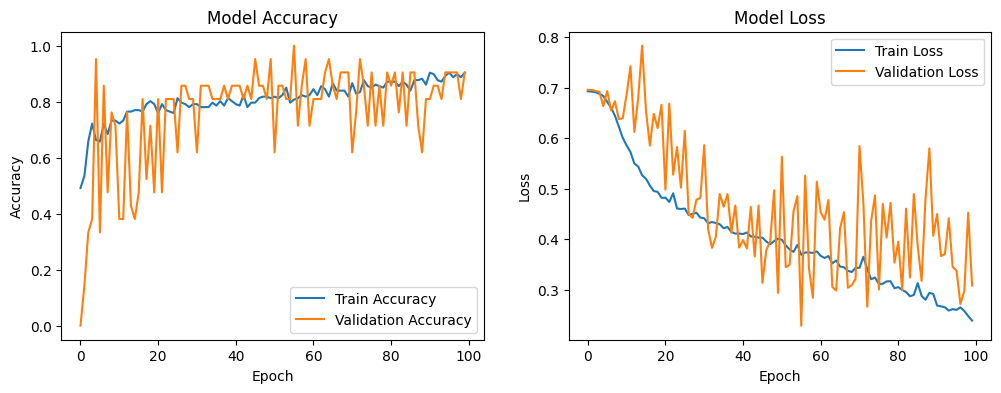

In [4]:
# Выбор случайных 30 признаков
random_indices = np.random.choice(X.shape[1], 30, replace=False)
X_reduce = X[:, random_indices]

model = Sequential()
model.add(Dense(60, input_dim=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_reduce, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

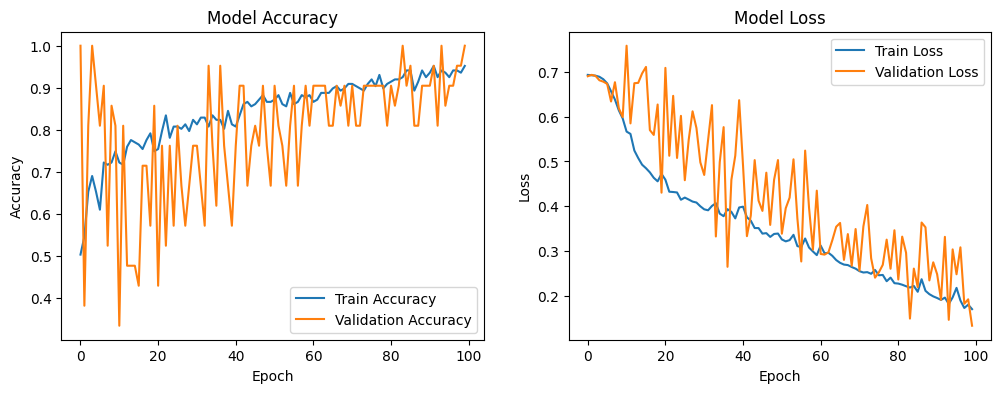

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

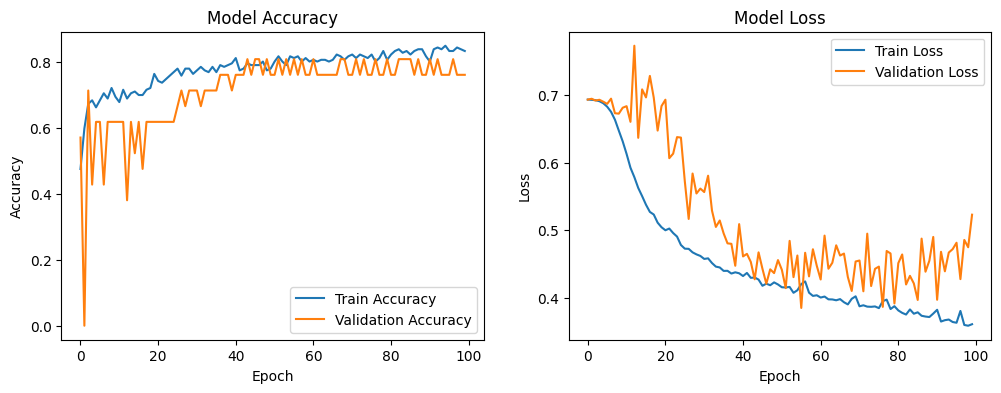

In [7]:
# Выбор случайных 30 признаков
random_indices = np.random.choice(X.shape[1], 30, replace=False)
X_reduce = X[:, random_indices]

model = Sequential()
model.add(Dense(30, input_dim=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_reduce, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Добавление промежуточного (скрытого) слоя Dense в архитектуру сети (размер входного слоя 60) с 15 нейронами

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


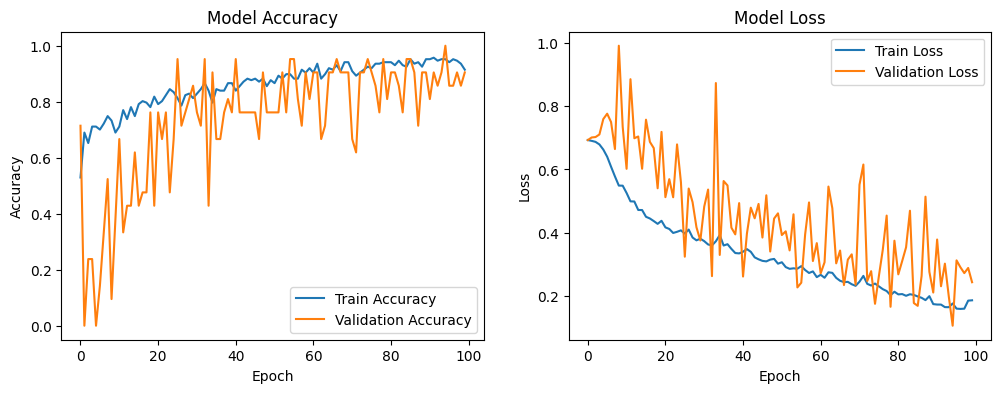

In [4]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

# Построение графика Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Построение графика Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

### Вывод
В ходе выполнения лабораторной работы были изучены влияние кол-ва нейронов на слое на результат обучения модели, влияние кол-ва слоев на результат обучения модели.
При сравнении полученных сетей можно сделать вывод, что модель с входным слоем (60 нейронов), скрытым слоем (15 нейронов) и выходным слоем оказалась наилучшей, так как графики точности и потерь получились более плавными, точность стремится к 1, потери - к 0, а из графиков на валидационной выборке можно сказать, что переобучение не было достигнуто.